In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from Analysis.model.helper import *
from Analysis.resources.costants import RESOURCES_DIRECTORY
from costants import ERROR, NAME, MEMORY, TIME


In [2]:
folder_name = "LanguageCompare"

LEGEND_1 = "Python"
LEGEND_2 = "Matlab"
data = read_data(os.path.join(RESOURCES_DIRECTORY,"data.csv"))
data

,Name,Rows,Columns,Error,Memory,Time,Language,OS,Nnz,Cond
0,apache2,715176,715176,2.235941e-08,0.004471,66.232192,1,0,4817870,5.316861e+06
1,apache2,715176,715176,4.388900e-11,2877.018100,13.430700,0,0,4817870,5.316861e+06
2,apache2,715176,715176,2.235941e-08,131.386811,83.372801,1,1,4817870,5.316861e+06
3,apache2,715176,715176,4.388900e-11,2769.992000,15.145300,0,1,4817870,5.316861e+06
4,cfd1,70656,70656,6.628463e-12,0.003326,4.461982,1,0,1825580,1.335081e+06
5,cfd1,70656,70656,1.135900e-13,577.585200,2.557600,0,0,1825580,1.335081e+06
6,cfd1,70656,70656,6.628463e-12,49.466571,5.382657,1,1,1825580,1.335081e+06
7,cfd1,70656,70656,1.135900e-13,560.592000,2.723700,0,1,1825580,1.335081e+06
8,cfd2,123440,123440,1.334161e-10,0.003326,10.917099,1,0,3085406,3.728473e+06
9,cfd2,123440,123440,3.348600e-13,1187.708900,6.083400,0,0,3085406,3.728473e+06


# Windows

Innanzitutto prendo in considerazione solo le righe che hanno come OS Windows

In [3]:
windowsDataset = data.loc[data['OS'] == 0]
windowsDataset

,Name,Rows,Columns,Error,Memory,Time,Language,OS,Nnz,Cond
0,apache2,715176,715176,2.235941e-08,0.004471,66.232192,1,0,4817870,5.316861e+06
1,apache2,715176,715176,4.388900e-11,2877.018100,13.430700,0,0,4817870,5.316861e+06
4,cfd1,70656,70656,6.628463e-12,0.003326,4.461982,1,0,1825580,1.335081e+06
5,cfd1,70656,70656,1.135900e-13,577.585200,2.557600,0,0,1825580,1.335081e+06
8,cfd2,123440,123440,1.334161e-10,0.003326,10.917099,1,0,3085406,3.728473e+06
9,cfd2,123440,123440,3.348600e-13,1187.708900,6.083400,0,0,3085406,3.728473e+06
12,ex15,6867,6867,5.281170e-05,0.003326,0.015078,1,0,98671,1.432642e+13
13,ex15,6867,6867,6.348200e-07,3.616800,0.030822,0,0,98671,1.432642e+13
16,G3_circuit,1585478,1585478,3.452568e-09,210.620559,27.939265,1,0,7660826,2.238425e+07
17,G3_circuit,1585478,1585478,3.576600e-12,3262.529500,19.503700,0,0,7660826,2.238425e+07


In [4]:

windows_py, windows_mat = get_data_sorted_by_language("Rows", windowsDataset)

In [5]:
windows_py

,Name,Rows,Columns,Error,Memory,Time,Language,OS,Nnz,Cond
12,ex15,6867,6867,5.281170e-05,0.003326,0.015078,1,0,98671,1.432642e+13
4,cfd1,70656,70656,6.628463e-12,0.003326,4.461982,1,0,1825580,1.335081e+06
24,shallow_water1,81920,81920,6.923992e-14,9.067514,0.615064,1,0,327680,3.628000e+00
8,cfd2,123440,123440,1.334161e-10,0.003326,10.917099,1,0,3085406,3.728473e+06
20,parabolic_fem,525825,525825,8.836779e-10,0.003326,6.439602,1,0,3674625,2.110820e+05
0,apache2,715176,715176,2.235941e-08,0.004471,66.232192,1,0,4817870,5.316861e+06
16,G3_circuit,1585478,1585478,3.452568e-09,210.620559,27.939265,1,0,7660826,2.238425e+07


### Error

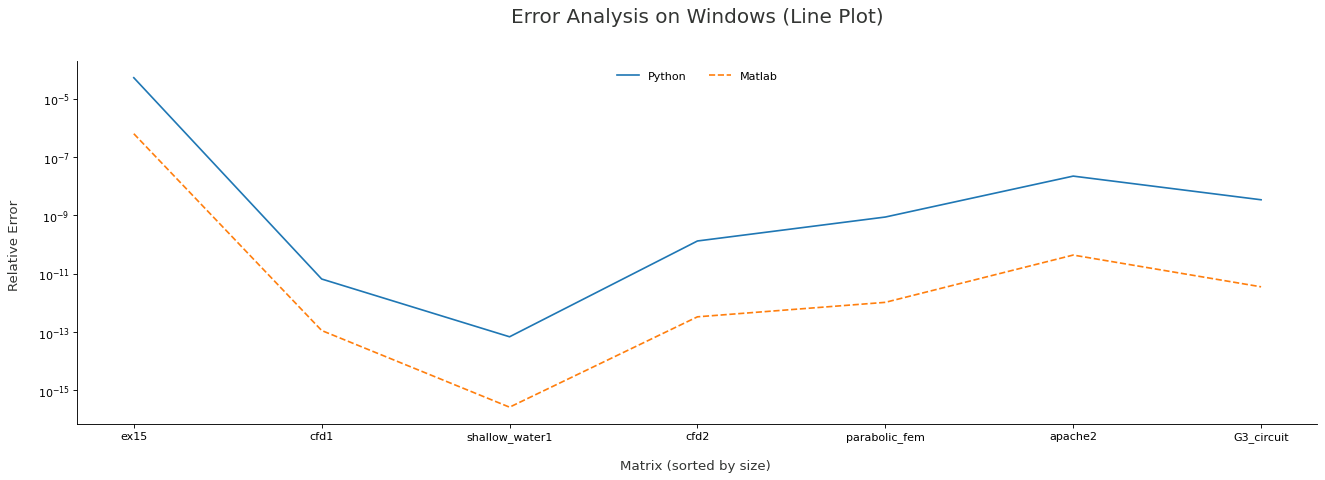

In [6]:
path = get_figures_path(folder_name, "error_windows_line.png")

plot(windows_py['Name'], windows_py['Error'], windows_mat['Error'], NAME, ERROR, "Error Analysis on Windows", LEGEND_1, LEGEND_2, path, LOG_SCALE=True)


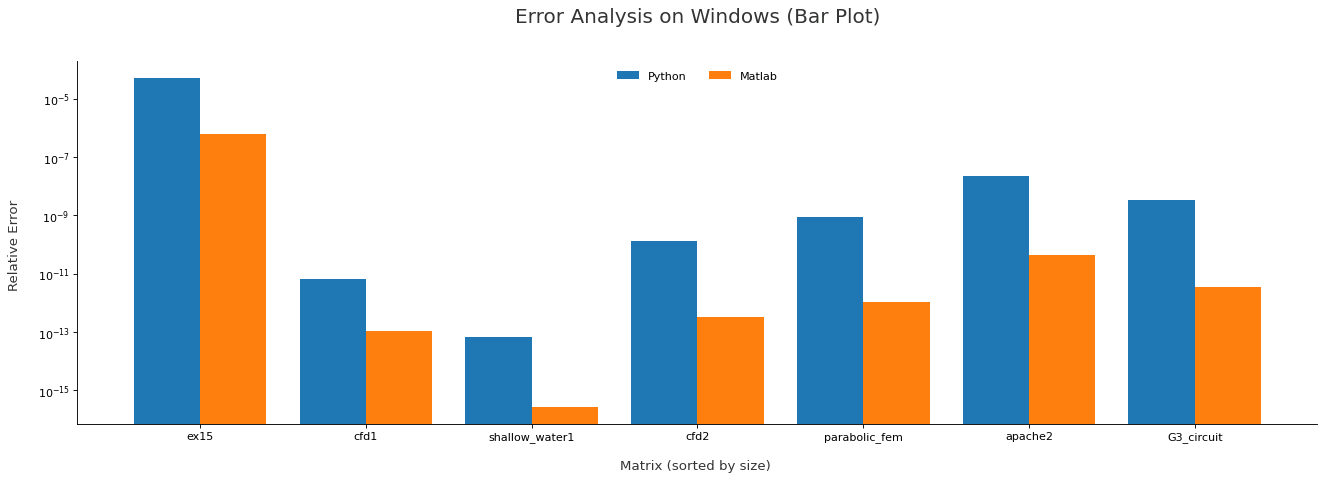

In [7]:
path = get_figures_path(folder_name, "error_windows_bar.png")

bar_plot(windows_py['Name'], windows_py['Error'], windows_mat['Error'], NAME, ERROR, "Error Analysis on Windows", LEGEND_1, LEGEND_2, path, LOG_SCALE=True)

### Memory

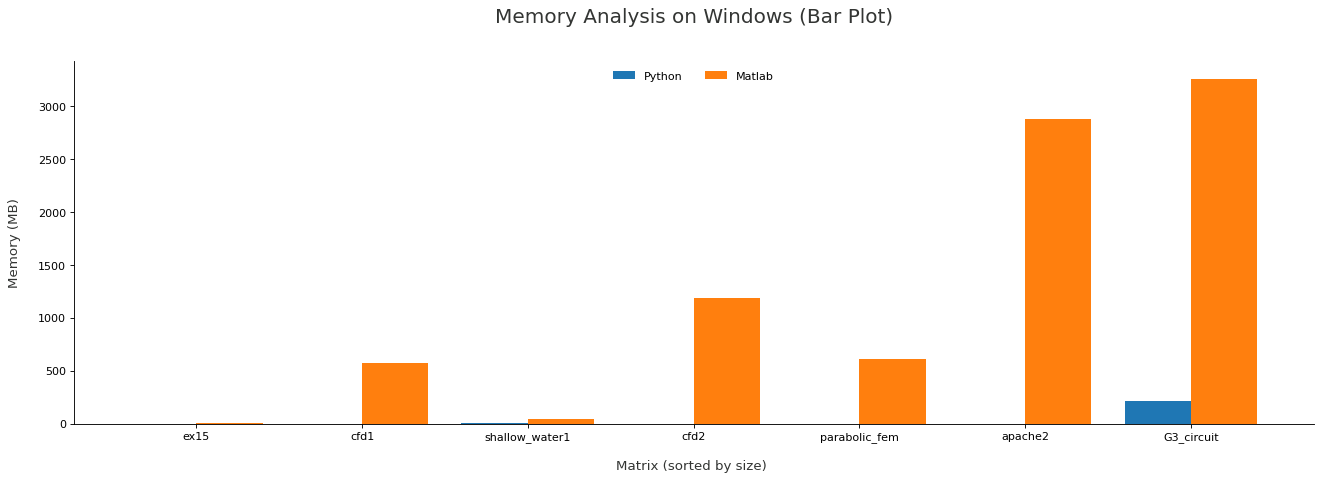

In [9]:
path = get_figures_path(folder_name, "memory_windows_line.png")

bar_plot(windows_py['Name'], windows_py['Memory'], windows_mat['Memory'], NAME, MEMORY, "Memory Analysis on Windows", LEGEND_1, LEGEND_2, path, Y_LABEL="MB")

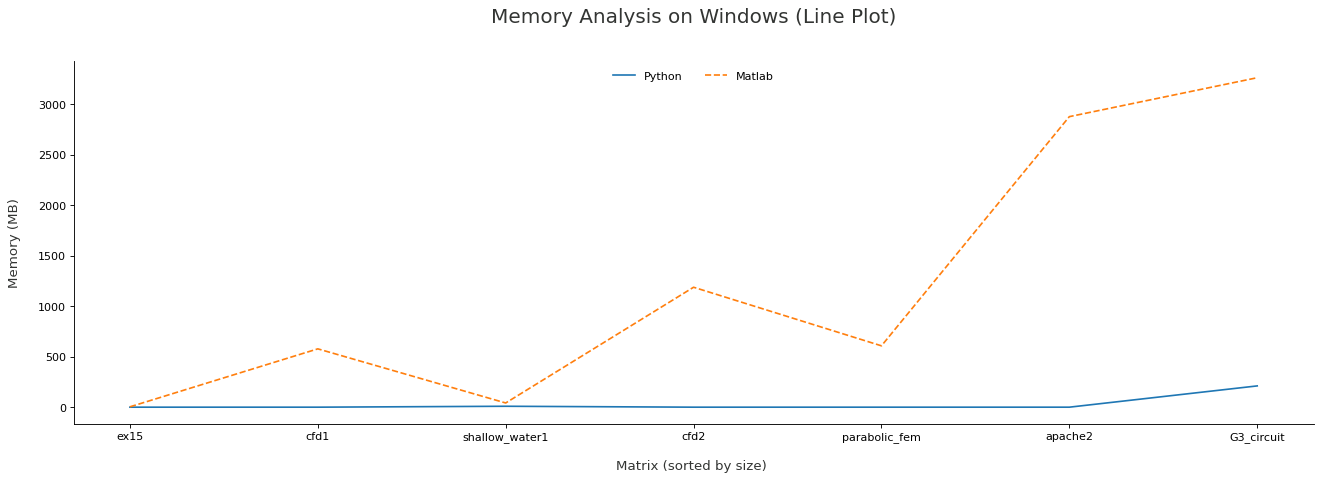

In [10]:
path = get_figures_path(folder_name, "memory_windows_bar.png")

plot(windows_py['Name'], windows_py['Memory'], windows_mat['Memory'], NAME, MEMORY, "Memory Analysis on Windows",LEGEND_1, LEGEND_2, path, Y_LABEL="MB")

### Time

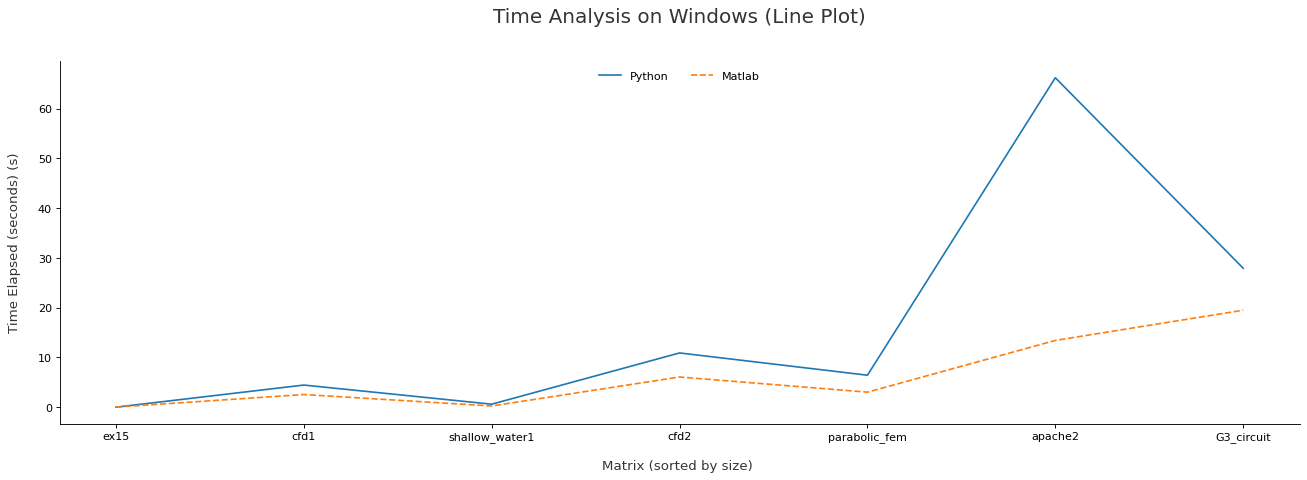

In [11]:
path = get_figures_path(folder_name, "time_windows_line.png")

plot(windows_py['Name'], windows_py['Time'], windows_mat['Time'], NAME, TIME, "Time Analysis on Windows", LEGEND_1, LEGEND_2, path, Y_LABEL="s")

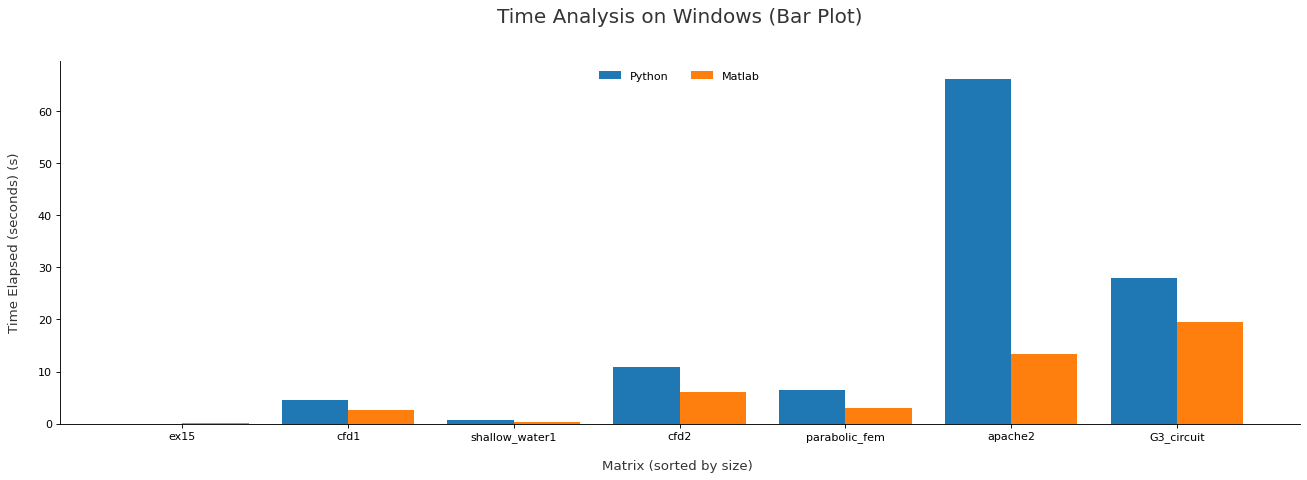

In [12]:
path = get_figures_path(folder_name, "time_windows_bar.png")

bar_plot(windows_py['Name'], windows_py['Time'], windows_mat['Time'], NAME, TIME, "Time Analysis on Windows", LEGEND_1, LEGEND_2, path, Y_LABEL="s")

# LINUX

In [13]:
linuxDataset = data.loc[data['OS'] == 1]
linuxDataset

,Name,Rows,Columns,Error,Memory,Time,Language,OS,Nnz,Cond
2,apache2,715176,715176,2.235941e-08,131.386811,83.372801,1,1,4817870,5.316861e+06
3,apache2,715176,715176,4.388900e-11,2769.992000,15.145300,0,1,4817870,5.316861e+06
6,cfd1,70656,70656,6.628463e-12,49.466571,5.382657,1,1,1825580,1.335081e+06
7,cfd1,70656,70656,1.135900e-13,560.592000,2.723700,0,1,1825580,1.335081e+06
10,cfd2,123440,123440,1.334161e-10,0.003326,13.483177,1,1,3085406,3.728473e+06
11,cfd2,123440,123440,3.348600e-13,1145.468000,6.241800,0,1,3085406,3.728473e+06
14,ex15,6867,6867,5.281170e-05,2.664623,0.022156,1,1,98671,1.432642e+13
15,ex15,6867,6867,6.348200e-07,0.000000,0.024699,0,1,98671,1.432642e+13
18,G3_circuit,1585478,1585478,3.452568e-09,0.003326,33.810687,1,1,7660826,2.238425e+07
19,G3_circuit,1585478,1585478,3.576600e-12,3203.660000,18.883200,0,1,7660826,2.238425e+07


In [14]:
linux_py, linux_mat = get_data_sorted_by_language("Rows", linuxDataset)
linux_py

,Name,Rows,Columns,Error,Memory,Time,Language,OS,Nnz,Cond
14,ex15,6867,6867,5.281170e-05,2.664623,0.022156,1,1,98671,1.432642e+13
6,cfd1,70656,70656,6.628463e-12,49.466571,5.382657,1,1,1825580,1.335081e+06
26,shallow_water1,81920,81920,6.923992e-14,0.003326,0.745701,1,1,327680,3.628000e+00
10,cfd2,123440,123440,1.334161e-10,0.003326,13.483177,1,1,3085406,3.728473e+06
22,parabolic_fem,525825,525825,8.836779e-10,0.003326,7.920758,1,1,3674625,2.110820e+05
2,apache2,715176,715176,2.235941e-08,131.386811,83.372801,1,1,4817870,5.316861e+06
18,G3_circuit,1585478,1585478,3.452568e-09,0.003326,33.810687,1,1,7660826,2.238425e+07


### ERROR

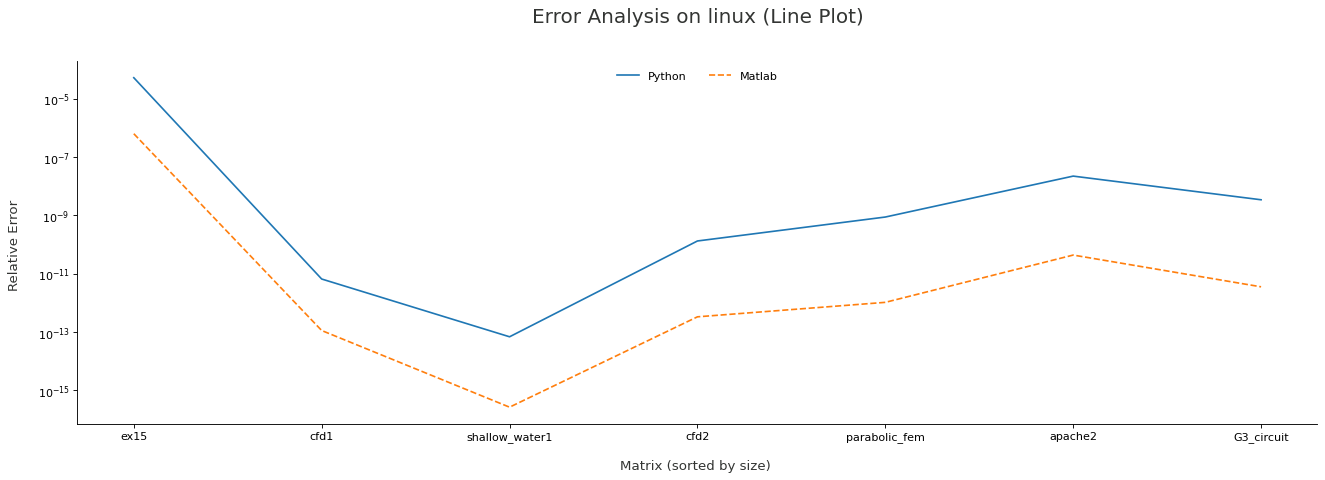

In [25]:
path = get_figures_path(folder_name, "error_linux_line.png")

plot(linux_py['Name'], linux_py['Error'], linux_mat['Error'], NAME, ERROR, "Error Analysis on linux", LEGEND_1, LEGEND_2, path, LOG_SCALE=True)


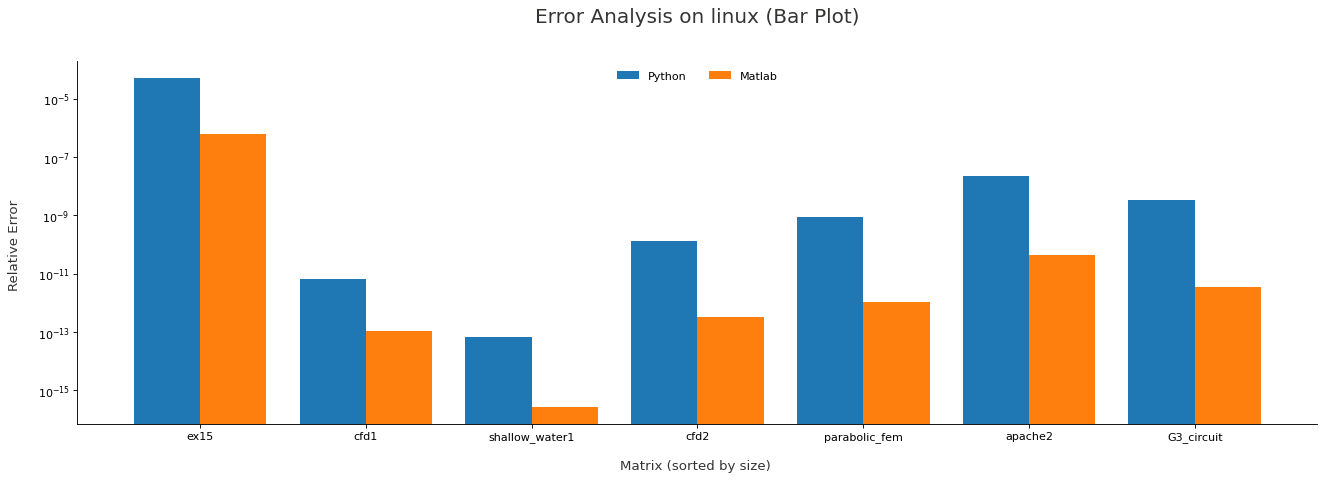

In [24]:
path = get_figures_path(folder_name, "error_linux_bar.png")

bar_plot(linux_py['Name'], linux_py['Error'], linux_mat['Error'], NAME, ERROR, "Error Analysis on linux", LEGEND_1, LEGEND_2, path, LOG_SCALE=True)


### MEMORY

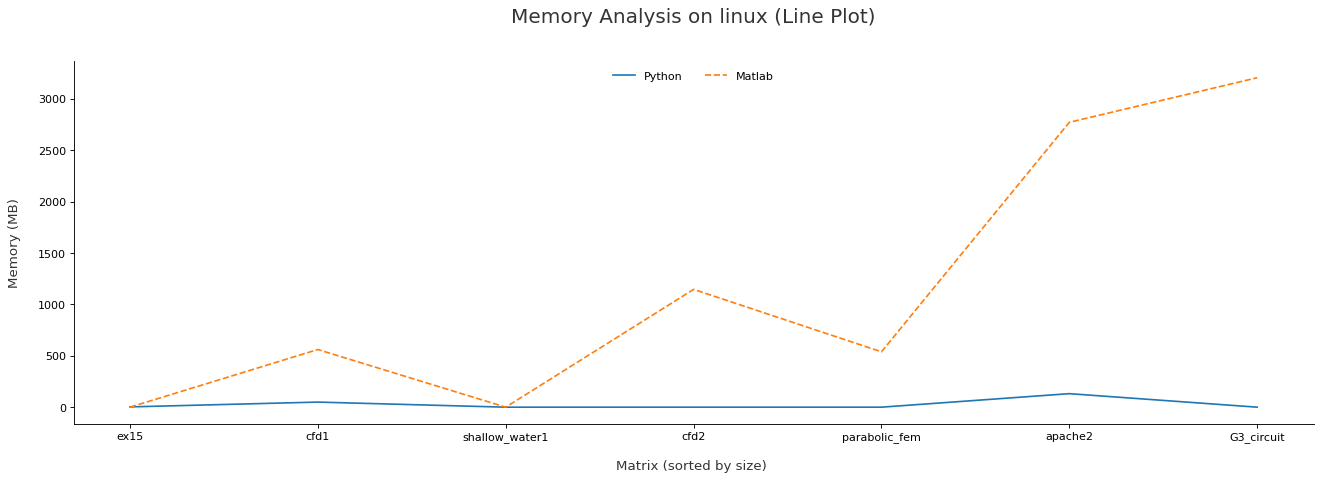

In [22]:
path = get_figures_path(folder_name, "memory_linux_line.png")

plot(linux_py['Name'], linux_py['Memory'], linux_mat['Memory'], NAME, MEMORY, "Memory Analysis on linux", LEGEND_1, LEGEND_2, path, Y_LABEL="MB")

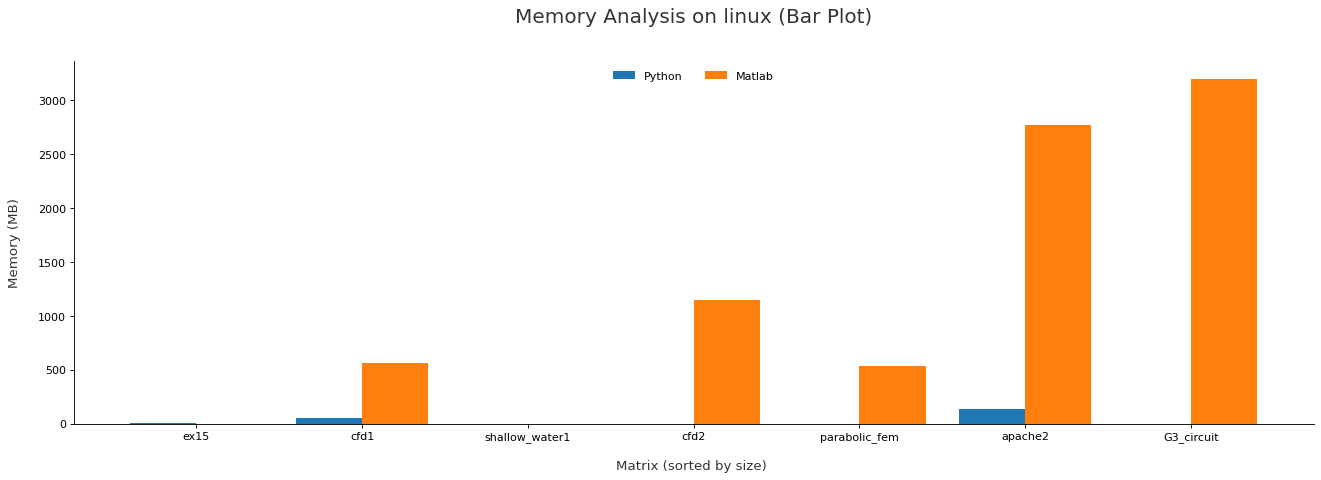

In [23]:
path = get_figures_path(folder_name, "memory_linux_bar.png")

bar_plot(linux_py['Name'], linux_py['Memory'], linux_mat['Memory'], NAME, MEMORY, "Memory Analysis on linux", LEGEND_1, LEGEND_2, path, Y_LABEL="MB")

### TIME

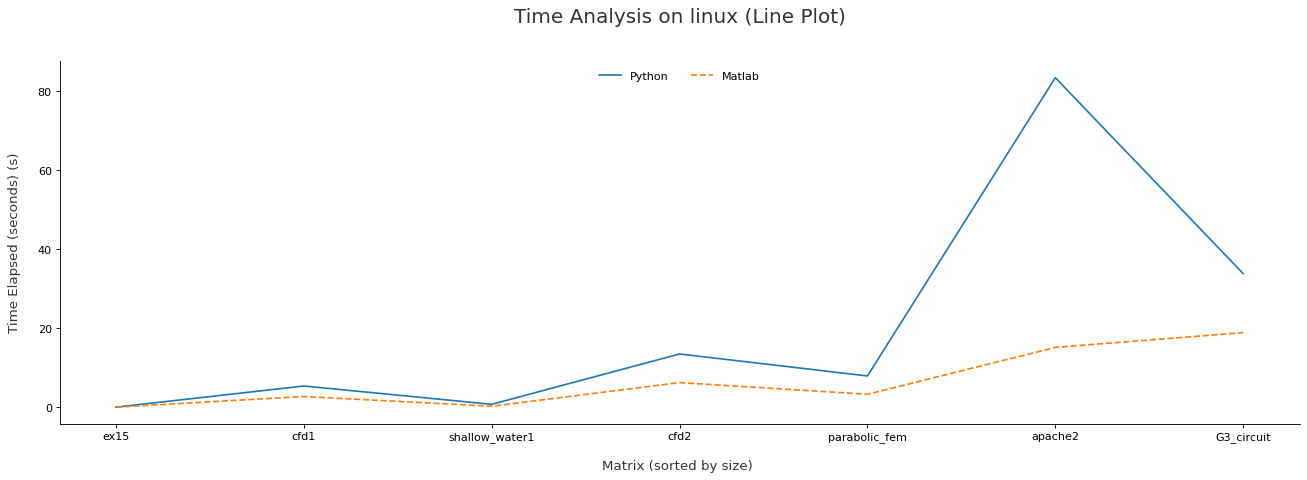

In [20]:
path = get_figures_path(folder_name, "time_linux_line.png")

plot(linux_py['Name'], linux_py['Time'], linux_mat['Time'], NAME, TIME, "Time Analysis on linux", LEGEND_1, LEGEND_2, path, Y_LABEL="s")

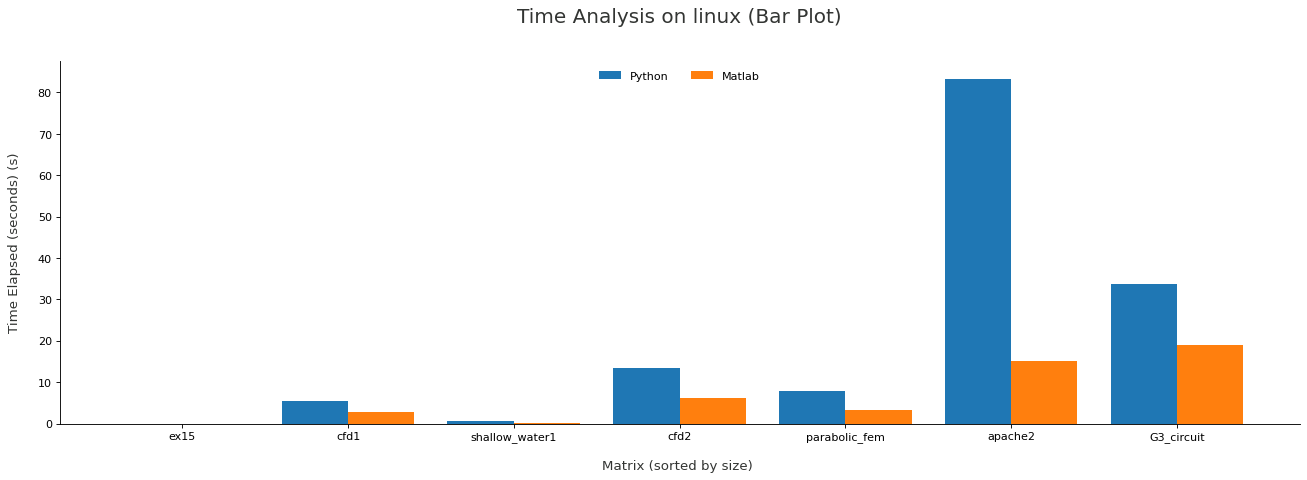

In [21]:
path = get_figures_path(folder_name, "time_linux_bar.png")

bar_plot(linux_py['Name'], linux_py['Time'], linux_mat['Time'], NAME, TIME, "Time Analysis on linux", LEGEND_1, LEGEND_2, path, Y_LABEL="s")